## My Capstone Project - Assignment 9
* Medical Insurance Price Prediction
* Uses a Kaggle Dataset

In [ ]:
%cd /content/drive/MyDrive/MyST1_CapstoneProject

/content/drive/MyDrive/MyST1_CapstoneProject


In [ ]:
!ls /content/drive/MyDrive/MyST1_CapstoneProject

DataForML.pkl  Medical_insurance.csv


Overview of the dataset:
The medical insurance dataset contains information about a number of factors that can affect medical expenses, including age, sex, BMI, smoking status, number of children, and region. This dataset can be used to train a machine learning model that can predict medical expenses for new customers.

To provide insights into the key factors that contribute to higher insurance costs and help the company make more informed decisions regarding pricing and risk assessment.The dataset contains 2.7K rows and 7 columns

Step 1: Reading the Data with Python

In [ ]:
# Suppressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reading the dataset
import pandas as pd
import numpy as np
MedicalData= pd.read_csv('/content/drive/MyDrive/MyST1_CapstoneProject/Medical_insurance.csv', encoding= 'latin')
print('Shape before deleting duplicate values:', MedicalData.shape)

# Removing duplicate rows if any
MedicalData= MedicalData.drop_duplicates()
print('Shape after deleting duplicate values:', MedicalData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
MedicalData.head(10)

Shape before deleting duplicate values: (2772, 7)
Shape after deleting duplicate values: (1337, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


Key Observations from step 1 about Data Description


*   The file contains medical information of 1337 individuals collected by a medical insurance company.
*  There are 7 attributes and they are outlined below.
*   age  - age of the individual, in years
*   sex - Biological sex of the individual
*   BMI - Body Mass Index
*   Children - The number of children the individual has.
*   Smoker - Indicates whether the individual is a smoker or non-smoker.
*   Region: The geographical region where the individual resides.
*   Charges: The insurance charges paid by the indovidual.

We are doing price prediction using regression model approach.










Step 2: Problem Statement Definition
*   Creating a prediction model to predict medical expenses (charges) for new customers.
*   Target Variable: Charges Predictors/Features: age, sex, BMI, smoking status, number of children, and region.



Step 3: Choosing the appropriate ML/AI Algorithm for Data Analysis.


*   Based on the problem statement we need to create a supervised ML Regression model, as the target variable is Continuous



Step 4: Looking at the class distribution (Target variable distribution to check if the
data is balanced or skewed)


<Axes: >

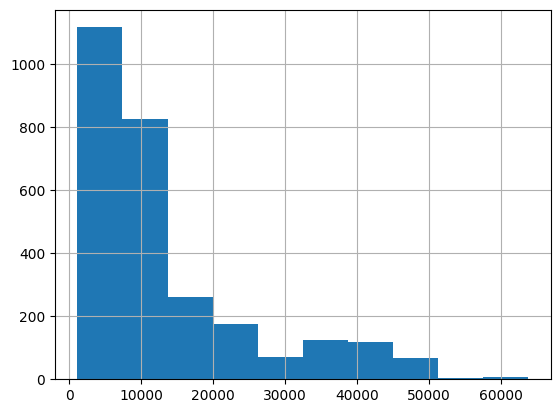

In [ ]:
%matplotlib inline
import pandas as pd
MedicalData= pd.read_csv('/content/drive/MyDrive/MyST1_CapstoneProject/Medical_insurance.csv', encoding= 'latin')
# Creating histogram as the Target variable is Continuous
# This will help us to understand the distribution of the MEDV values
MedicalData['charges'].hist()


Observations from Step 4:
The histogram is moderately skewed to the right, which may introduce some bias into the model's prediction.

Step 5: Basic Explorartory Data Analysis

In [ ]:
#Looking at sample rows in the data
MedicalData.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Observing the summarized information of data
MedicalData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [ ]:
# Looking at the descriptive statistics of the data
MedicalData.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,2772.000000,2772,2772.000000,2772.000000,2772,2772,2772.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,1406,NaN,NaN,2208,766,NaN
mean,39.109668,NaN,30.701349,1.101732,NaN,NaN,13261.369959
std,14.081459,NaN,6.129449,1.214806,NaN,NaN,12151.768945
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,26.000000,NaN,26.220000,0.000000,NaN,NaN,4687.797000
50%,39.000000,NaN,30.447500,1.000000,NaN,NaN,9333.014350
75%,51.000000,NaN,34.770000,2.000000,NaN,NaN,16577.779500


In [ ]:
# Finding unique values for each column.
# To understand which column is categorical ad which one is continuous.
# If the number of unique values<20 then the variable is likely to be a category otherwise continuous.
MedicalData.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

Observations from Step 5: Basic Exploratory Data Analysis
Based on the basic exploration above, we can now create a simple report of the data, notting down our observations regarding each column.
*   age - Continuous. Selected
*   sex - Categorical.Selected
*   bmi - Continuous.Selected
*   children - Categorical.Selected
*   smoker - Categorical.Selected
*   region - Categorical.Selected
*   charges - Continuous.Selected. This is the Target/Class Variable which needs to be predicted by the proposed regression model.









Step 6: Removing Unwanted Columns


*   There are no qualitative columns in the data.
*   Hence, there is no need to remove any column.



Step 7: Visual Exploratory Data Analysis

*   Based on the Basic Exploration Data Analysis in the previou step, we could spot four categorical predictors in the data: 'sex', 'children', 'smoker'and 'region.

*   We will use bar charts to see how the data is distributed for these categorical columns.



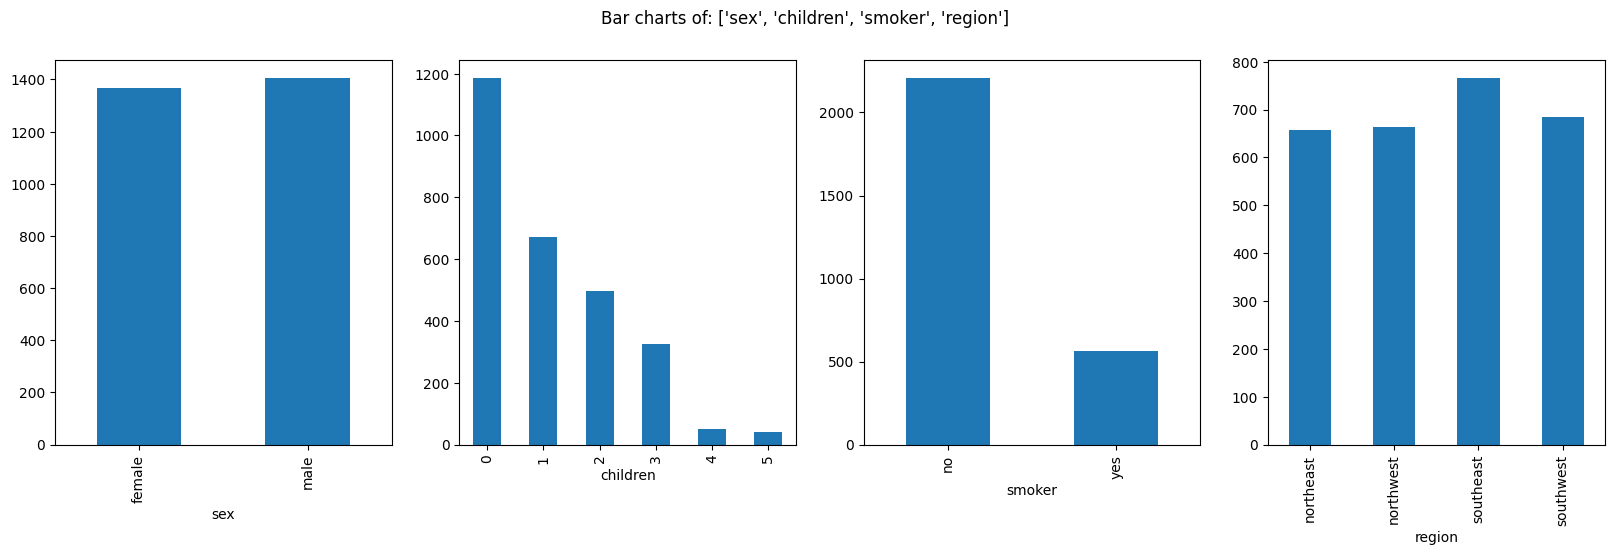

In [ ]:
# Plotting multiple bar charts at once for categorical variables.
# Since there is no default function which can plot bar charts for multiple columns at once.
# We are defining our own functions for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline

    import matplotlib.pyplot as plt

    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

#####################################################################
# Calling the function PlotBarCharts() we have created
import pandas as pd
MedicalData= pd.read_csv('/content/drive/MyDrive/MyST1_CapstoneProject/Medical_insurance.csv', encoding= 'latin')
PlotBarCharts(inpData=MedicalData, colsToPlot=['sex','children','smoker','region'])


Observations from Step 8 - Visual Exploratory Data Analysis

*   Bar charts have allowed interpretation on the two data columns.
*   The bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.
*   In the ideal bar chart, each category has comparable frequency.*Hence, there are enough rows for each category in the data for the ML/AI regression algorithm to learn.
*   In this dataset, it is worth noting that 'children' and 'smoker' are skewed.There is just one bar which is dominating and other has low rows.
*   Such columns may not be correlated with the target variable because there is no information to learn.   
*   We can confirm this with the correlation analysis step, and take a final call to select or reject the column/data attribute.
*   Selected Categorical Variables ('sex', 'children', 'smoker', 'region')









Step 9: Visualizing Distribution of all the Continuous Predictor variables in the data using histograms


*   Based on the Basic Exploratory Data Analysis, there are two continuous predictor variables 'age' and 'bmi'.



array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>]],
      dtype=object)

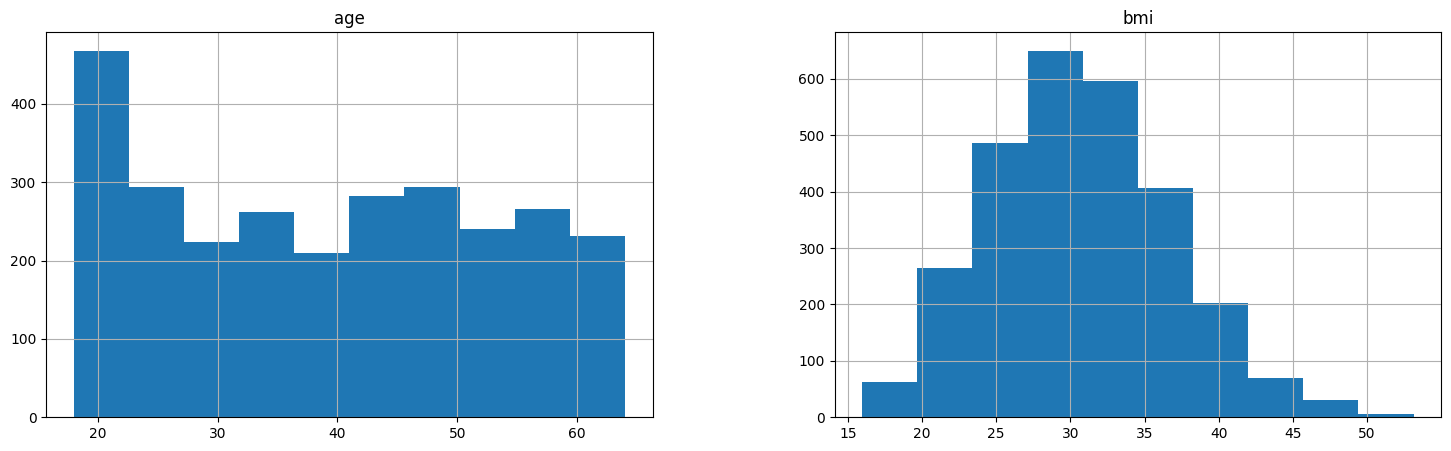

In [ ]:
# Plotting histograms of multiple columns together.
MedicalData.hist(['age','bmi'], figsize= (18,5))

Observations fron Step 9:
* Histogram Interpretation.
* Each histogram shows us the data distribution for a single continuous variable.
* The X-axis shows the range of values and Y-axis represents the number of values in that range.
* Selected Continuous Variables:
* age: Selected. The distribution is good.
* bmi: Selected. The distribution is good.

Step 10: Outliers Analysis

* Outliers are extreme values in the data which are far away from most of the values, seen as tails in the histogram.
* Outliers bias the building of machine learninig models, and must be treated one column/attribute at a time.
* From Step 9, we observe that none of the continuous variables has outiers, so we skip the outliers removal step.



Step 11: Missing Value Analysis


In [ ]:
# Finding how many missing values are there for each column.
MedicalData.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Observations from Step 11: Missing Value Analysis
* No missing values in this data.
* So no removal of any data samples(rows) is needed.

Step 12: Feature Selection (Attribute Selection)
* **For this dataset, the Target variable is Continuous, hence the following two scenarios will need attention:**
* Continuous Target Variable vs Continuous Predictor
* Continuous Target Variable vs Categorical Predictor

Relationship Exploration: Continuous vs Continuous

* When the Target variable is continuous and the predictor is also continuous, we can visualize the relationship between the two variables using scatter plot and measure the strength of relation using a metric called pearson's correlationn value.  

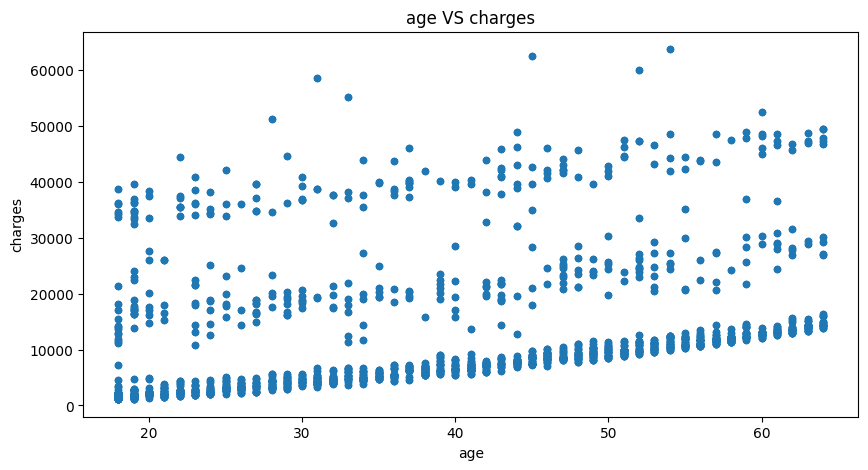

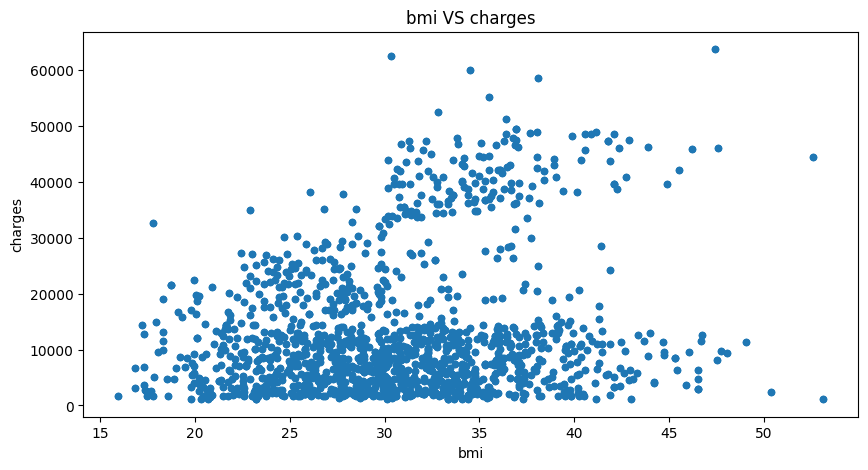

In [ ]:
ContinuousCols= ['age','bmi']
# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
  MedicalData.plot.scatter(x=predictor, y='charges', figsize=(10,5), title=predictor+" VS "+ 'charges')

Scatter Charts Interpretation:

**age VS charges**
* The scatter plot shows positive correlation between age and charges. (Increasing Trend)
* This means that as age increases, there is a general tendency for charges to also increase.

**bmi VS charges**
* A possible positive correlation is observed between bmi and charges.(Increasing Trend)
* This means that as bmi increases, there might be a tendency for charges to also increase.

Step 13: Statistical Feature Selection (Continuous Vs Continuous) using Correlation value
* We will use Pearson's correlation coefficient for doing this.


In [ ]:
 # Calculating correlation matrix
 ContinuousCols= ['charges','age','bmi']

 # Creating the correlation matrix
 CorrelationData= MedicalData[ContinuousCols].corr()
 CorrelationData

,charges,age,bmi
charges,1.000000,0.298624,0.199846
age,0.298624,1.000000,0.113048
bmi,0.199846,0.113048,1.000000


In [ ]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['charges'][abs(CorrelationData['charges']) > 0.5]

charges    1.0
Name: charges, dtype: float64

In [ ]:
# Since no continuous variable is chosen, we will reduce the threshold to 0.2
CorrelationData['charges'][abs(CorrelationData['charges']) > 0.2]

charges    1.000000
age        0.298624
Name: charges, dtype: float64

Observations from Step 13:
* Final selected continuous columns:
* **'age' and 'charges'**

Step 14: Relationship Exploration: Categorical VS Continuous -- Box Plots

*  When the target variable is Continuous and the predictor variable is Categorical we analyze the relation using Boxplots, and
* Measure the strength of relation using Anova test

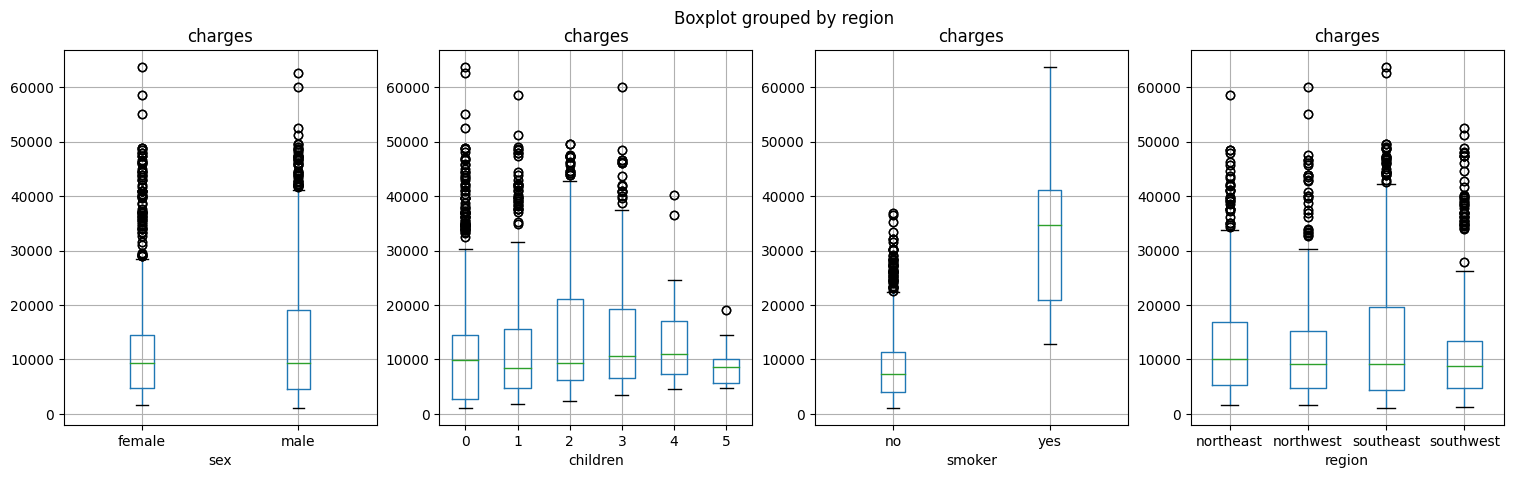

In [ ]:
# Box plots for continuous Target variable "charges" and Categorical predictors
CategoricalColsList=['sex', 'children', 'smoker', 'region']

import matplotlib.pyplot as plt
fig, PlotCanvas= plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target variable "charges"
for PredictorCol, i in zip(CategoricalColsList, range(len(CategoricalColsList))):
  MedicalData.boxplot(column='charges', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

Observations from Step 14:
* For this dataset, the categoricl predictors,'children', 'smoker', and 'region' look correlated with the target variable.

 We confirm this by looking at the results of ANOVA test below

Step 15:  Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

In [ ]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return(SelectedPredictors)
 #Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['children','smoker','region']
FunctionAnova(inpData=MedicalData,
              TargetVariable='charges',
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

children is correlated with charges | P-Value: 5.245131349307128e-07
smoker is correlated with charges | P-Value: 0.0
region is correlated with charges | P-Value: 0.00015591629888162578


['children', 'smoker', 'region']

Observations from Step 15
 * The results of ANOVA confirm our visual analysis using box plots above.
 * All categorical variables are correlated with the Target variable.
 Final selected Categorical columns:

 'children', 'smoker', 'region'

Selecting final Predictors/Features for building Machine Learning/AI model:

 Based on the extensive tests with exploratory data analysis, we can select the nal features/predictors/columns for machine learning
 model building as:
 'children', 'smoker', 'region' and 'age'.

In [ ]:
SelectedColumns=['children', 'smoker', 'region', 'age']
# Selecting final columns
DataForML= MedicalData[SelectedColumns]
DataForML.head()

,children,smoker,region,age
0,0,yes,southwest,19
1,1,no,southeast,18
2,3,no,southeast,28
3,0,no,northwest,33
4,0,no,northwest,32


In [ ]:
# Saving this final data subset for reference during deployment
DataForML.to_pickle('DataForML.pkl')

 Step 16: Data Pre-processing for Machine Learning Model Building or Model Development

Converting the nominal variable to numeric using get_dummies()

In [ ]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)
# Adding Target Variable to the data
DataForML_Numeric['charges']=MedicalData['charges']
# Printing sample rows
DataForML_Numeric.head()

,children,age,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,0,19,False,True,False,False,False,True,16884.92400
1,1,18,True,False,False,False,True,False,1725.55230
2,3,28,True,False,False,False,True,False,4449.46200
3,0,33,True,False,False,True,False,False,21984.47061
4,0,32,True,False,False,True,False,False,3866.85520


 Step 17: Machine Learning Model Development:


In [ ]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['children', 'age', 'smoker_no', 'smoker_yes', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest', 'charges'],
      dtype='object')

In [ ]:
 #Separate Target Variable and Predictor Variables
 TargetVariable='charges'
 Predictors=['children', 'age', 'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']
 X=DataForML_Numeric[Predictors].values
 y=DataForML_Numeric[TargetVariable].values
 # Split the data into training and testing set
 from sklearn.model_selection import train_test_split
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

Step 18: Standardization/Normalization of data

In [ ]:
### Standardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization andsSS MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1940, 8)
(1940,)
(832, 8)
(832,)


Step 19:  Multiple Linear Regression Algorithm For ML/AI model building

In [ ]:
 #Multiple Linear Regression
 import numpy as np
 from sklearn.linear_model import LinearRegression
 RegModel = LinearRegression()
 # Printing all the parameters of Linear regression
 print(RegModel)
 # Creating the model on Training Data
 LREG=RegModel.fit(X_train,y_train)
 prediction=LREG.predict(X_test)
 from sklearn import metrics
 # Measuring Goodness of fit in Training data
 print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))
 ###########################################################################
 print('\n##### Model Validation and Accuracy Calculations ##########')
 # Printing some sample values of prediction
 TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
 TestingDataResults[TargetVariable]=y_test
 TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
 # Printing sample prediction values
 print(TestingDataResults.head())
 # Calculating the error for each row
 TestingDataResults['APE']=100 * ((abs(
 TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])
 MAPE=np.mean(TestingDataResults['APE'])
 MedianMAPE=np.median(TestingDataResults['APE'])
 Accuracy =100 - MAPE
 MedianAccuracy=100- MedianMAPE
 print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
 print('Median Accuracy on test data:', MedianAccuracy)
 # Defining a custom function to calculate accuracy
 # Make sure there are no zeros in the Target variable if you are using MAPE
 def Accuracy_Score(orig,pred):
     MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
 #print('#'*70,'Accuracy:', 100-MAPE)
     return(100-MAPE)
 # Custom Scoring MAPE calculation
 from sklearn.metrics import make_scorer
 custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
 # Importing cross validation function from sklearn
 from sklearn.model_selection import cross_val_score
 # Running 10-Fold Cross validation on a given algorithm
 # Passing full data X and y because the K-fold will split the data and automatically choose train/test
 Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
 print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
 print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.7297025868870389

##### Model Validation and Accuracy Calculations ##########
   children       age  smoker_no  smoker_yes  region_northeast  \
0       0.0  0.673913        1.0         0.0               0.0   
1       0.0  0.956522        0.0         1.0               1.0   
2       0.2  0.847826        1.0         0.0               0.0   
3       0.0  0.086957        1.0         0.0               0.0   
4       0.4  0.000000        1.0         0.0               1.0   

   region_northwest  region_southeast  region_southwest      charges  \
0               1.0               0.0               0.0   8988.15875   
1               0.0               0.0               0.0  28101.33305   
2               0.0               0.0               1.0  12032.32600   
3               0.0               0.0               1.0   1682.59700   
4               0.0               0.0               0.0   3393.35635   

   Predictedcharges  
0           10120.0  
1           37788

Decision Tree Regressor

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value: 0.7653810954405706

##### Model Validation and Accuracy Calculations ##########
   children       age  smoker_no  smoker_yes  region_northeast  \
0       0.0  0.673913        1.0         0.0               0.0   
1       0.0  0.956522        0.0         1.0               1.0   
2       0.2  0.847826        1.0         0.0               0.0   
3       0.0  0.086957        1.0         0.0               0.0   
4       0.4  0.000000        1.0         0.0               1.0   

   region_northwest  region_southeast  region_southwest      charges  \
0               1.0               0.0               0.0   8988.15875   
1               0.0               0.0               0.0  28101.33305   
2               0.0               0.0               1.0  12032.32600   
3               0.0               0.0               1.0   1682.59700   
4               0.0               0.0               0.0   3393.35635   

   Predictedcharges

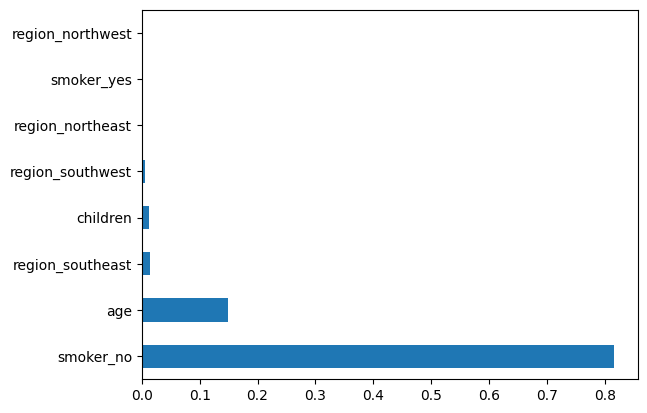

In [ ]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5,criterion='friedman_mse')
# Good Range of Max_depth = 2 to 20
# Printing all the parameters of Decision Tree
print(RegModel)
# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
# Printing sample prediction values
print(TestingDataResults.head())
# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)
# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)
# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

Plotting/Visualizing the Decision Tree

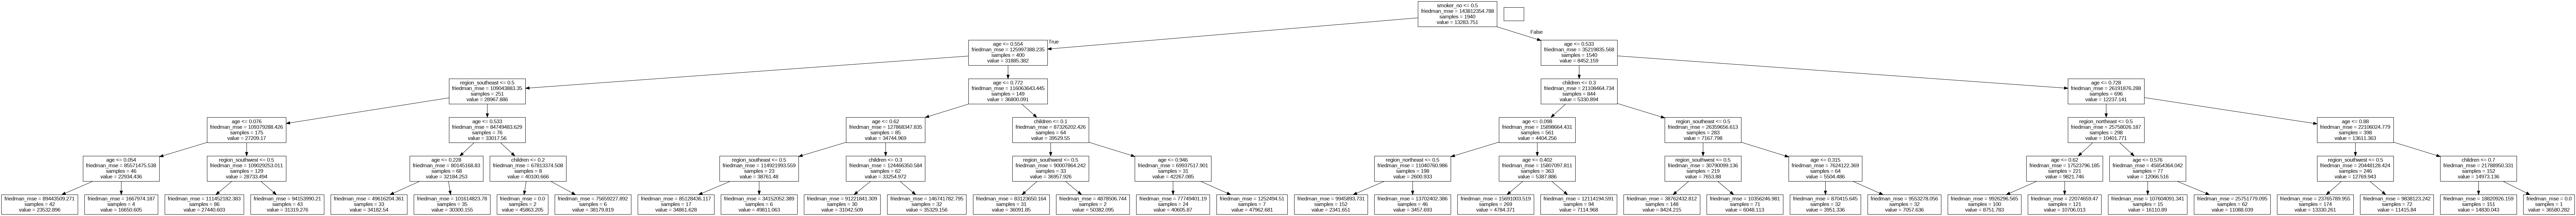

In [ ]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus
# Create DOT data
dot_data = tree.export_graphviz(RegModel, out_file=None,
feature_names=Predictors, class_names=TargetVariable)
# printing the rules
#print(dot_data)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
# Show graph
Image(graph.create_png(), width=1000,height=1000)
# Double click on the graph to zoom in


Random Forest Regressor


RandomForestRegressor(criterion='friedman_mse', max_depth=4, n_estimators=400)
R2 Value: 0.7570829741075993

##### Model Validation and Accuracy Calculations ##########
   children       age  smoker_no  smoker_yes  region_northeast  \
0       0.0  0.673913        1.0         0.0               0.0   
1       0.0  0.956522        0.0         1.0               1.0   
2       0.2  0.847826        1.0         0.0               0.0   
3       0.0  0.086957        1.0         0.0               0.0   
4       0.4  0.000000        1.0         0.0               1.0   

   region_northwest  region_southeast  region_southwest      charges  \
0               1.0               0.0               0.0   8988.15875   
1               0.0               0.0               0.0  28101.33305   
2               0.0               0.0               1.0  12032.32600   
3               0.0               0.0               1.0   1682.59700   
4               0.0               0.0               0.0   3393.35635   

 

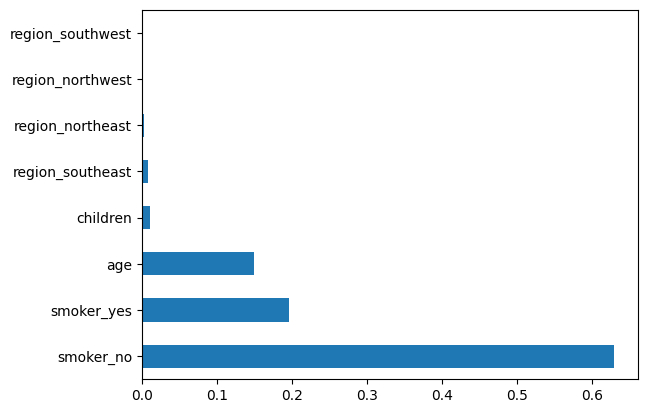

In [ ]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=4, n_estimators=400,criterion='friedman_mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000
# Printing all the parameters of Random Forest
print(RegModel)
# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
# Printing sample prediction values
print(TestingDataResults.head())
# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)
# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

 Step 20: AdaBoost Algorithm For ML/AI model building

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=100)
R2 Value: 0.7213780480418267

##### Model Validation and Accuracy Calculations ##########
   children       age  smoker_no  smoker_yes  region_northeast  \
0       0.0  0.673913        1.0         0.0               0.0   
1       0.0  0.956522        0.0         1.0               1.0   
2       0.2  0.847826        1.0         0.0               0.0   
3       0.0  0.086957        1.0         0.0               0.0   
4       0.4  0.000000        1.0         0.0               1.0   

   region_northwest  region_southeast  region_southwest      charges  \
0               1.0               0.0               0.0   8988.15875   
1               0.0               0.0               0.0  28101.33305   
2               0.0               0.0               1.0  12032.32600   
3               0.0               0.0               1.0   1682.59700   
4               0.0         

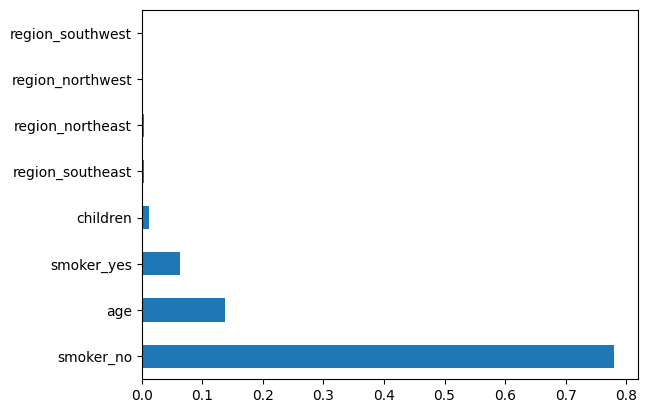

In [ ]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)
# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
# Printing sample prediction values
print(TestingDataResults.head())
# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)
# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
     MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
     #print('#'*70,'Accuracy:', 100-MAPE)
     return(100-MAPE)
# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

XG Boost Regressor

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)
R2 Value: 0.7742868416414092

##### Model Validation and Accuracy Calculations ##########
   children       age  smoker_no  smoker_yes  region_northeast  \
0       0.0  0.673913        1.0         0.0               0.0   
1       0.0  0.956522     

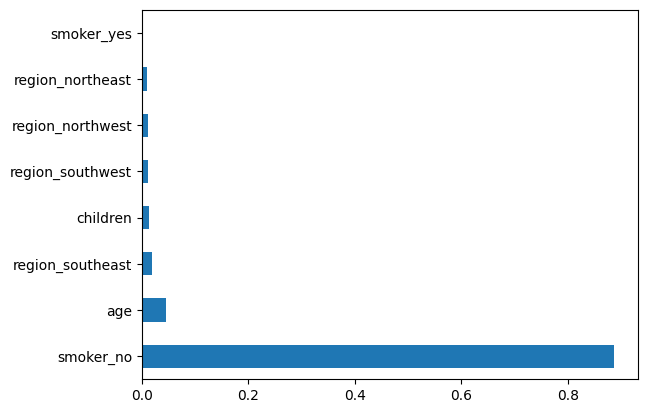

In [ ]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
learning_rate=0.1,
n_estimators=1000,
objective='reg:linear',
booster='gbtree')
# Printing all the parameters of XGBoost
print(RegModel)
# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
# Printing sample prediction values
print(TestingDataResults.head())
# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)
# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
      MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
      #print('#'*70,'Accuracy:', 100-MAPE)
      return(100-MAPE)
# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

K-Nearest Neighbor(KNN)

In [ ]:
#kNN
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)
# Printing all the parameters of KNN
print(RegModel)
# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))
# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
# Printing sample prediction values
print(TestingDataResults.head())
# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)
# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)
# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.8627779833692112

##### Model Validation and Accuracy Calculations ##########
   children       age  smoker_no  smoker_yes  region_northeast  \
0       0.0  0.673913        1.0         0.0               0.0   
1       0.0  0.956522        0.0         1.0               1.0   
2       0.2  0.847826        1.0         0.0               0.0   
3       0.0  0.086957        1.0         0.0               0.0   
4       0.4  0.000000        1.0         0.0               1.0   

   region_northwest  region_southeast  region_southwest      charges  \
0               1.0               0.0               0.0   8988.15875   
1               0.0               0.0               0.0  28101.33305   
2               0.0               0.0               1.0  12032.32600   
3               0.0               0.0               1.0   1682.59700   
4               0.0               0.0               0.0   3393.35635   

   Predictedcharges  
0            8886.0  
1

Best Model Selection:
* The highest final average accuracy was achieved in K- Nearest Neighbour (71.48)
* We are going to use that to create our predictive model.

In [ ]:
!pip install joblib
import joblib
from sklearn.neighbors import KNeighborsRegressor

# Assuming 'X_train' and 'y_train' are your training data
model = KNeighborsRegressor()
# Train the model...

# Save the model to a file
joblib.dump(model, 'knn_model.pkl')

['knn_model.pkl']